# Analysis of Clan Culture and Family Farms in China

## Objective:
This analysis explores the relationship between clan culture intensity and the development of family farms in rural China.


## Part 1: Collect Genealogy Data

To measure the strength of clan culture across cities, I scraped a dataset of genealogy compilations from the online catalog of the Shanghai Library.


In [ ]:
# Scrape and Transform Genealogy Data
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
sys.path.append(src_path)

# Import pipeline modules
import download_genealogies
import transform_genealogies

download_genealogies.download_genealogies(
    start_page=1,
    num_pages=5160,
    chromedriver_path=os.path.join(project_root, "tools", "chromedriver-win64", "chromedriver.exe"),
    output_dir=os.path.join(project_root, "data")
)

input_path = os.path.join(project_root, "data", "data_raw_genealogy_En.csv")
output_path = os.path.join(project_root, "data", "genealogy_panel.csv")

transform_genealogies.transform_genealogy_data(
    input_path=input_path,
    output_path=output_path
)

In [21]:
import os
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_path = os.path.join(project_root, "data", "genealogy_panel.csv")
df = pd.read_csv(file_path)
df.iloc[1780:1785]

,Province,City,Year,genealogy_Count
1780,安徽,宣城市,1849,1
1781,安徽,宣城市,1850,1
1782,安徽,宣城市,1851,1
1783,安徽,宣城市,1854,1
1784,安徽,宣城市,1857,2


## Part 2: Merge and Clean Data

To analyze the relationship between clan culture and family farm development, we merged multiple datasets into a single city-year panel dataset.

### Datasets Used:

1. **Genealogy Panel** (`genealogy_panel.csv`)
   - Aggregated genealogy records by city and year

2. **Family Farm Statistics** (`family_farms.xlsx`)
   - Collected from China Academy for Rural Development – Qiyan China Agri-research Database (CCAD).

3. **Socioeconomic and Agricultural Indicators** (`city_data_panel.xlsx`)
   - Collected from China City Statistical Yearbook (2013–2023)

### Data Cleaning Process:

- Checked and harmonized administrative city names across datasets.
- Converted all numeric fields to appropriate formats.
- Filled or dropped missing values as needed.
- Constructed cumulative clan intensity indicators:
  - `clan_intensity_cumsum_log`: log-transformed cumulative intensity
  - `clan_intensity_cumsum_log` is defined as:


In [13]:
from IPython.display import display, Math, Markdown

display(Math(r"\text{ClanIntensity}_{it} = \log\left( \frac{ \sum_{s \leq t} \text{Genealogies}_{is} }{ \text{Population}_{it} / 1{,}000{,}000 } + 1 \right)"))

display(Markdown("""
**where:**
- $i$: city
- $t$: current year
- $s \\leq t$: all years up to and including year $t$
- $\\text{Genealogies}_{is}$: number of genealogies compiled in year $s$ in city $i$
- $\\text{Population}_{it}$: population of city $i$ in year $t$
"""))


<IPython.core.display.Math object>


**where:**
- $i$: city
- $t$: current year
- $s \leq t$: all years up to and including year $t$
- $\text{Genealogies}_{is}$: number of genealogies compiled in year $s$ in city $i$
- $\text{Population}_{it}$: population of city $i$ in year $t$


### Finally, I merged the datasets to construct a unified dataset:
**`dataset.csv`**


In [22]:
import os
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_path = os.path.join(project_root, "data", "dataset.csv")
df = pd.read_csv(file_path)

df.head(5)

,province_code,city_code,province_name,city_name,year,genealogy_count,clan_intensity_cumsum,clan_intensity_cumsum_log,new_family_farms,closed_family_farms,...,cultivated_area_1000_ha,rural_rejuvenation_index,agri_machinery_power_per_capita_kw,total_grain_capacity_10k_ton,pesticide_fertilizer_use_10k_ton,rural_net_income_per_capita_yuan,rural_income_growth_rate_percent,safe_drinking_water_rate_percent,rural_road_paving_rate_percent,road_area_per_capita_sqm
0,110000,110000,北京市,北京市,2013,48,3.646585,1.536133,1.0,0.0,...,221.1573,7.008672,282651.329334,244586.677302,5914.755975,634184.339118,549.140820,314.608720,312.551193,5910.323842
1,110000,110000,北京市,北京市,2014,43,6.871424,2.063239,4.0,0.0,...,219.9467,7.278788,277767.863564,249293.021256,6109.434578,658830.698884,539.172945,326.027700,321.003439,6243.778636
2,110000,110000,北京市,北京市,2015,59,11.257389,2.506129,2.0,0.0,...,219.3267,7.418180,293682.851000,262355.355290,6295.464596,671794.095714,532.577285,333.921852,339.982153,6401.060082
3,110000,110000,北京市,北京市,2016,52,15.072503,2.777110,1.0,0.0,...,216.3333,7.650216,304068.599712,259502.508144,6559.345994,691807.056372,525.546040,333.275876,348.932270,6464.847820
4,110000,110000,北京市,北京市,2017,53,18.972429,2.994353,0.0,0.0,...,213.7306,7.949894,310348.979768,276533.593300,6794.881146,720197.290421,526.845982,356.404385,373.214530,6793.358607


## Part 3: Descriptive Statistics



In [23]:
import os
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_path = os.path.join(project_root, "data", "dataset.csv")
df = pd.read_csv(file_path)

df.describe()

,province_code,city_code,year,genealogy_count,clan_intensity_cumsum,clan_intensity_cumsum_log,new_family_farms,closed_family_farms,total_family_farms,registered_population_10k,...,cultivated_area_1000_ha,rural_rejuvenation_index,agri_machinery_power_per_capita_kw,total_grain_capacity_10k_ton,pesticide_fertilizer_use_10k_ton,rural_net_income_per_capita_yuan,rural_income_growth_rate_percent,safe_drinking_water_rate_percent,rural_road_paving_rate_percent,road_area_per_capita_sqm
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,...,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03,3450.000000,3450.000000,3450.000000,3450.000000
mean,383913.043478,384950.967536,2017.994203,7.185797,11.052541,1.802543,156.704348,24.173623,656.617101,431.943474,...,735.374433,0.458880,18256.042938,16052.021448,389.860485,4.152561e+04,36.556672,20.621892,20.654111,390.307933
std,138752.648452,138873.523684,3.159979,16.147855,20.284271,1.171102,419.432059,86.393536,1481.533490,321.951139,...,18669.847038,0.916524,36590.364838,31930.877411,777.900266,8.295568e+04,52.337840,41.172810,41.308406,779.836694
min,110000.000000,110000.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-54214.991190,0.068612,2212.135200,2269.165500,57.390507,6.213057e+03,-17.739382,2.951345,3.095320,56.533544
25%,320000.000000,320700.000000,2015.000000,0.000000,1.463657,0.901646,4.000000,0.000000,25.000000,222.000000,...,138.320000,0.283254,11602.728621,10115.120160,241.688386,2.558377e+04,28.926463,12.887016,12.913529,240.870697
50%,410000.000000,410900.000000,2018.000000,2.000000,5.494944,1.871024,32.000000,3.000000,178.000000,362.500000,...,295.440005,0.398541,15367.341354,13748.964240,337.535358,3.605478e+04,30.952733,17.810973,17.757061,337.131870
75%,460000.000000,460300.000000,2021.000000,8.000000,12.954764,2.635821,142.750000,18.000000,643.000000,566.750000,...,527.658750,0.457846,18160.501984,15987.468936,388.094932,4.146899e+04,33.375309,20.465306,20.567140,388.463147
max,640000.000000,640500.000000,2023.000000,234.000000,311.290864,5.743935,8137.000000,1973.000000,29776.000000,3416.000000,...,772945.000000,14.288988,565987.822512,518930.535564,11921.386089,1.293343e+06,589.098899,644.296690,655.651440,12114.303743


## Part 4: Visualization







## 4.1 Time series

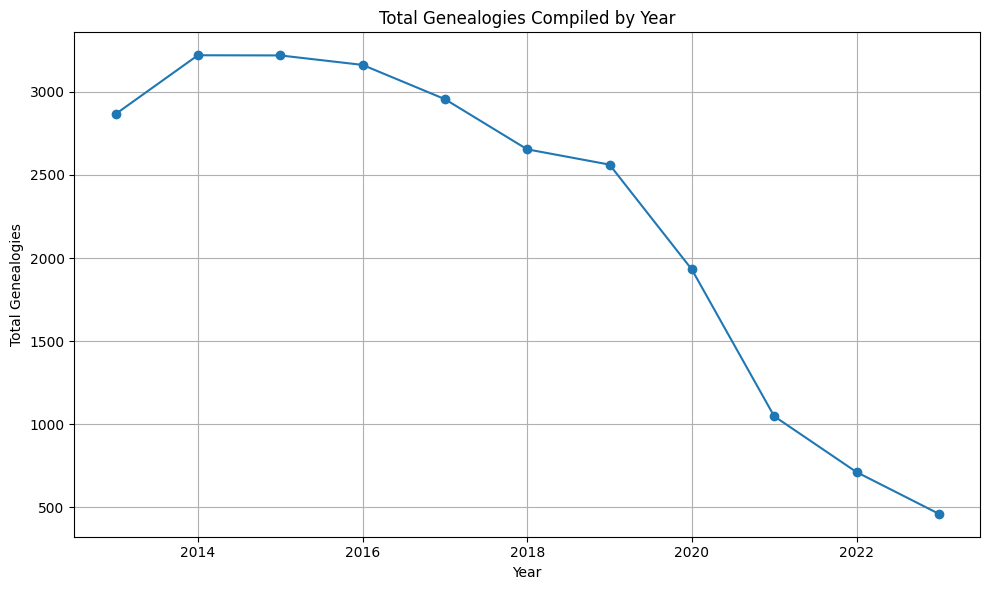

In [24]:
import matplotlib.pyplot as plt

genealogy_by_year = df.groupby("year")["genealogy_count"].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(genealogy_by_year["year"], genealogy_by_year["genealogy_count"], marker='o')
plt.title("Total Genealogies Compiled by Year")
plt.xlabel("Year")
plt.ylabel("Total Genealogies")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.2 Scatter plots


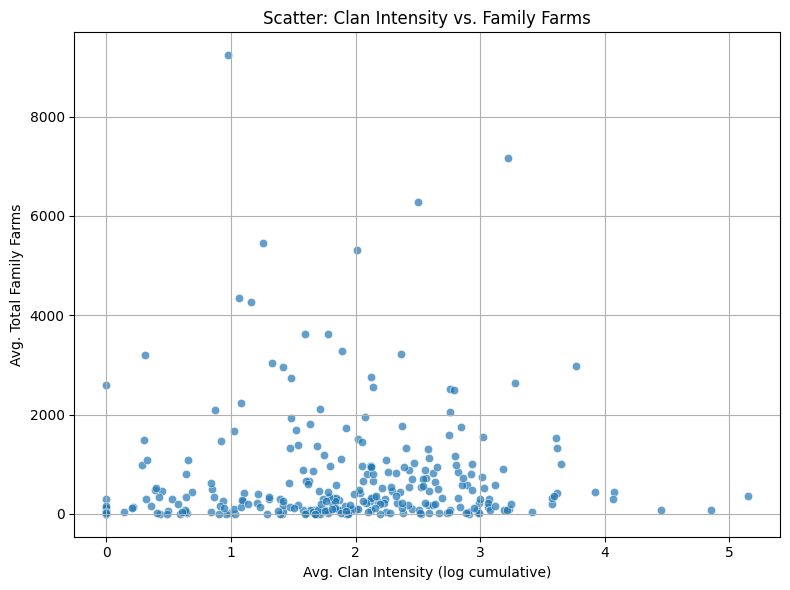

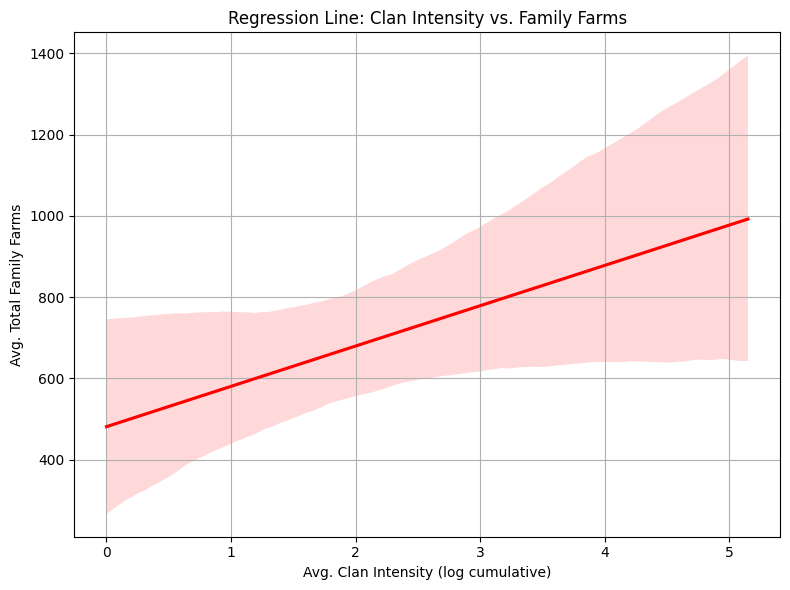

In [28]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("../figures", exist_ok=True)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=city_avg,
    x="clan_intensity_cumsum_log",
    y="total_family_farms",
    alpha=0.7
)
plt.title("Scatter: Clan Intensity vs. Family Farms")
plt.xlabel("Avg. Clan Intensity (log cumulative)")
plt.ylabel("Avg. Total Family Farms")
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/plot_clan_vs_farms_scatter.png", dpi=300)
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(
    data=city_avg,
    x="clan_intensity_cumsum_log",
    y="total_family_farms",
    scatter=False,
    color="red"
)
plt.title("Regression Line: Clan Intensity vs. Family Farms")
plt.xlabel("Avg. Clan Intensity (log cumulative)")
plt.ylabel("Avg. Total Family Farms")
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/plot_clan_vs_farms_regline.png", dpi=300)
plt.show()



## Part5: Dashboard


In [53]:
import os
import subprocess

dashboard_path = None
for root, dirs, files in os.walk(".."):
    if "dashboard.py" in files:
        dashboard_path = os.path.abspath(os.path.join(root, "dashboard.py"))
        break
if dashboard_path:
    subprocess.Popen(["streamlit", "run", dashboard_path])
